# Analysis of an X-ray Diffraction to materials


This notebook deals with the data analysis of an X-ray Diffractogram as an alternative study to interpret the results obtained from a given material, whether crystalline or amorphous.

In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, cufflinks as cf, plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

- If the data is .txt file, so make to .csv file:

In [2]:
data = pd.read_fwf('Amostra 6.txt')
data.to_csv('Amostra 6.csv')

- Importing data:

In [3]:
amos = pd.read_csv('Amostra 6.csv', names=["x", "y"])
amos.head()

,x,y
NaN,5.00,2.500
0.0,NaN,NaN
1.0,5.02,6.667
2.0,NaN,NaN
3.0,5.04,4.167


- Plotting graph to see more or less how to proceed the analysis

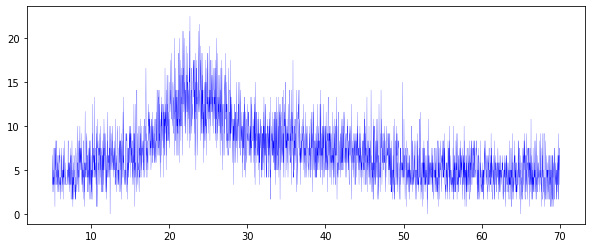

In [4]:
plt.figure(figsize=(10, 4), clear=True)
plt.plot(amos['x'].dropna(), amos['y'].dropna(), color='blue', linewidth=0.2)

So this graph shows just once angle of maximum intensity. Let's find out the data. . .

- Clean data is needed to be better:

In [5]:
amos = amos[['x', 'y']].dropna()
amos.head()

,x,y
NaN,5.00,2.500
1.0,5.02,6.667
3.0,5.04,4.167
5.0,5.06,4.167
7.0,5.08,3.333


In [6]:
amos.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3251 entries, nan to 6499.0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3251 non-null   float64
 1   y       3251 non-null   float64
dtypes: float64(2)
memory usage: 76.2 KB


This dataset have 3251 entries.

- Checking the angles with maximum intensity: 

In [7]:
amos[amos['y'] == amos['y'].max()]

,x,y
1763.0,22.64,22.5


So the angle with maximum intensity is 22.64°, when the intensity is 22.5.

- Defining this maximum intensity: 

In [8]:
Imax = sum(amos[amos['y'] == amos['y'].max()]['x'])
Imax

22.64

- Plotting of the graph:

As previously said there is only one angle of maximum intensity

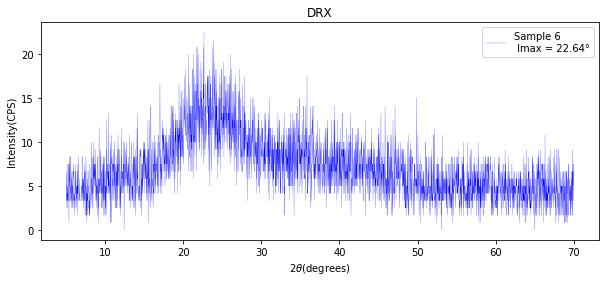

In [9]:
plt.figure(figsize=(10, 4), clear=True)
plt.plot(amos['x'], amos['y'], color='blue', linewidth=0.2)
plt.xlabel(r'2$\theta$(degrees)')
plt.ylabel('Intensity(CPS)')
plt.legend(['Sample 6 \n Imax = {}°'.format(Imax)], loc=1)
plt.title('DRX');
#fig.savefig('Amostra 6.png')   ## To save the figure

The sample does not show peaks of crystallinity, with bands of amorphous scattering around 22.64 ° (2𝜃), characteristic of an amorphous material.

- Interactive plot:

Just to make it cooler.

In [10]:
px.line(amos, x="x", y="y", title='DRX', labels={'x': r'$2\theta(graus)$', 'y':'Intensidade(CPS)'})

As it is possible to interact with the graph, see the corresponding peaks and angles.

Enjoy ;)